In [1]:
import glob
import os

import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io

from helpers.cell_type_naming import nice_to_weirds, weird_to_nice

plotly.io.renderers.default = "jupyterlab+png"

In [2]:
# PARAM
results_dir = "5d_results_noise_0.1"

### load tirosh sc data

In [3]:
sc_rna_seq = pd.read_csv(
    "gs://liulab/ftp/GSE115978/GSE115978_tpm.csv",
    index_col=0,
).rename_axis(index="GeneSymbol", columns="cells")

g = len(sc_rna_seq)

sc_rna_seq

cells       cy78_CD45_neg_1_B04_S496_comb  \
GeneSymbol                                  
C9orf152                         0.000000   
RPS11                            8.144184   
ELMO2                            2.639232   
CREB3L1                          0.000000   
PNMA1                            3.656496   
...                                   ...   
PIK3IP1                          0.936591   
SNRPD2                           5.374866   
SLC39A6                          3.326681   
CTSC                             2.612352   
AQP7                             0.000000   

cells       cy79_p4_CD45_neg_PDL1_neg_E11_S1115_comb  CY88_5_B10_S694_comb  \
GeneSymbol                                                                   
C9orf152                                    0.000000              0.000000   
RPS11                                       5.915091              7.243164   
ELMO2                                       0.000000              0.732052   
CREB3L1                                     0.000000              0.000000   
PNMA1                                       0.000000              0.536053   
...                                              ...                   ...   
PIK3IP1                                     5.761498              0.000000   
SNRPD2                                      0.000000              5.437661   
SLC39A6                                     0.000000              1.308011   
CTSC                                        0.000000              2.361768   
AQP7                                        0.000000              0.000000   

cells       cy79_p1_CD45_neg_PDL1_pos_AS_C1_R1_F07_S67_comb  \
GeneSymbol                                                    
C9orf152                                           0.000000   
RPS11                                              6.019502   
ELMO2                                              3.687956   
CREB3L1                                            0.000000   
PNMA1                                              3.041418   
...                                                     ...   
PIK3IP1                                            0.000000   
SNRPD2                                             6.240581   
SLC39A6                                            3.516141   
CTSC                                               1.094236   
AQP7                                               0.000000   

cells       cy78_CD45_neg_3_H06_S762_comb  \
GeneSymbol                                  
C9orf152                         0.000000   
RPS11                            7.974753   
ELMO2                            2.599318   
CREB3L1                          0.000000   
PNMA1                            4.132741   
...                                   ...   
PIK3IP1                          2.034216   
SNRPD2                           5.946754   
SLC39A6                          3.868390   
CTSC                             1.934705   
AQP7                             0.000000   

cells       cy79_p1_CD45_neg_PDL1_pos_AS_C1_R1_G01_S73_comb  \
GeneSymbol                                                    
C9orf152                                           0.000000   
RPS11                                              5.557257   
ELMO2                                              1.691087   
CREB3L1                                            0.000000   
PNMA1                                              2.827006   
...                                                     ...   
PIK3IP1                                            0.000000   
SNRPD2                                             4.628132   
SLC39A6                                            1.791189   
CTSC                                               0.852798   
AQP7                                               0.000000   

cells       cy79_p1_CD45_neg_PDL1_neg_AS_C4_R1_D09_S141_comb  \
GeneSymbol                                                     
C9orf152                                     

In [4]:
sc_rna_seq_metadata = pd.read_csv(
    "gs://liulab/ftp/GSE115978/GSE115978_cell.annotations.csv",
).replace({"cell.types": weird_to_nice})

sc_rna_seq_metadata

cells samples cell.types  \
0                       cy78_CD45_neg_1_B04_S496_comb   Mel78  Malignant   
1            cy79_p4_CD45_neg_PDL1_neg_E11_S1115_comb   Mel79  Malignant   
2                                CY88_5_B10_S694_comb   Mel88  Malignant   
3     cy79_p1_CD45_neg_PDL1_pos_AS_C1_R1_F07_S67_comb   Mel79  Malignant   
4                       cy78_CD45_neg_3_H06_S762_comb   Mel78  Malignant   
...                                               ...     ...        ...   
7181                CY75_1_CD45_CD8_3__S168_comb_BCD8   Mel75      T CD8   
7182                CY75_1_CD45_CD8_8__S338_comb_BCD8   Mel75      T CD8   
7183                       monika_D7_S132_comb_BCD8_3   Mel75      T CD8   
7184                CY75_1_CD45_CD8_8__S289_comb_BCD8   Mel75      T CD8   
7185                CY75_1_CD45_CD8_8__S351_comb_BCD8   Mel75      T CD8   

      treatment.group  Cohort  no.of.genes  no.of.reads  
0      post.treatment  Tirosh         8258       357919  
1     treatment.naive  Tirosh         2047         5727  
2      post.treatment  Tirosh         5375       139218  
3     treatment.naive  Tirosh         5648        73996  
4      post.treatment  Tirosh         7409       380341  
...               ...     ...          ...          ...  
7181   post.treatment  Tirosh         3530       137245  
7182   post.treatment  Tirosh         3872       106432  
7183   post.treatment  Tirosh         4589       908173  
7184   post.treatment  Tirosh         4614       140903  
7185   post.treatment  Tirosh         3859       222239  

[7186 rows x 7 columns]

In [5]:
sc_rna_seq_metadata["samples"].value_counts()

Mel79       894
Mel75       506
Mel80       431
Mel89       391
Mel88       352
Mel102      322
Mel103      317
Mel94       311
Mel98       270
Mel110      258
Mel194      249
Mel105      234
Mel60       226
Mel81       205
Mel106      190
Mel72       181
Mel129pa    179
Mel84       159
Mel478      154
Mel74       147
Mel53       143
Mel58       142
Mel78       124
Mel112      113
Mel121.1    105
Mel126       95
Mel71        89
Mel128       89
Mel116       84
Mel82        84
Mel04.3      78
Mel129pb     64
Name: samples, dtype: int64

In [6]:
sc_rna_seq_metadata["cell.types"].value_counts().sort_index()

?               307
B               818
CAF             106
Endothelial     104
Macrophage      420
Malignant      2018
NK               92
T CD4           856
T CD8          1759
T.cell          706
Name: cell.types, dtype: int64

In [7]:
cell_types = list(sorted(
    cell_type
    for cell_type in sc_rna_seq_metadata["cell.types"].unique()
    if cell_type not in ["?"]
))

c = len(cell_types)

cell_types

['B',
 'CAF',
 'Endothelial',
 'Macrophage',
 'Malignant',
 'NK',
 'T CD4',
 'T CD8',
 'T.cell']

In [8]:
s = 30  # number of samples
samples = pd.Series([f"sample_{j:03d}" for j in range(s)], name="Mixture")
samples

0     sample_000
1     sample_001
2     sample_002
3     sample_003
4     sample_004
5     sample_005
6     sample_006
7     sample_007
8     sample_008
9     sample_009
10    sample_010
11    sample_011
12    sample_012
13    sample_013
14    sample_014
15    sample_015
16    sample_016
17    sample_017
18    sample_018
19    sample_019
20    sample_020
21    sample_021
22    sample_022
23    sample_023
24    sample_024
25    sample_025
26    sample_026
27    sample_027
28    sample_028
29    sample_029
Name: Mixture, dtype: object

In [9]:
rng = np.random.default_rng(seed=0)

proportions = rng.dirichlet((0.5,) * c, size=(s,))
fraction_values = np.array([rng.multinomial(50, p) for p in proportions]) / 50

fractions = pd.DataFrame(
    fraction_values,
    index=samples,
    columns=cell_types
)

fractions_and_empty_csx_metrics = fractions.copy()
fractions_and_empty_csx_metrics[["P-value", "Correlation", "RMSE"]] = (0, 0, 0)

fractions_and_empty_csx_metrics.head()
# how sparse are the counts?
# print((cell_type_counts_per_sample == 0).mean())

fractions_and_empty_csx_metrics

B   CAF  Endothelial  Macrophage  Malignant    NK  T CD4  \
Mixture                                                                   
sample_000  0.06  0.00         0.12        0.02       0.08  0.20   0.20   
sample_001  0.04  0.00         0.14        0.18       0.20  0.16   0.02   
sample_002  0.16  0.02         0.02        0.00       0.00  0.26   0.44   
sample_003  0.04  0.06         0.00        0.08       0.02  0.34   0.12   
sample_004  0.06  0.02         0.02        0.06       0.00  0.32   0.00   
sample_005  0.40  0.00         0.06        0.00       0.04  0.00   0.12   
sample_006  0.32  0.00         0.14        0.00       0.02  0.08   0.00   
sample_007  0.08  0.48         0.00        0.00       0.00  0.00   0.00   
sample_008  0.04  0.02         0.00        0.24       0.18  0.04   0.36   
sample_009  0.32  0.10         0.12        0.00       0.08  0.00   0.06   
sample_010  0.02  0.00         0.00        0.02       0.20  0.34   0.34   
sample_011  0.12  0.16         0.04        0.02       0.00  0.08   0.00   
sample_012  0.12  0.00         0.04        0.12       0.18  0.28   0.12   
sample_013  0.02  0.00         0.10        0.08       0.46  0.00   0.16   
sample_014  0.02  0.08         0.04        0.02       0.16  0.54   0.00   
sample_015  0.14  0.18         0.12        0.00       0.10  0.34   0.10   
sample_016  0.00  0.10         0.06        0.00       0.10  0.04   0.02   
sample_017  0.02  0.28         0.08        0.42       0.00  0.06   0.00   
sample_018  0.08  0.00         0.14        0.10       0.22  0.12   0.12   
sample_019  0.08  0.02         0.00        0.02       0.28  0.08   0.18   
sample_020  0.34  0.04         0.00        0.00       0.04  0.20   0.04   
sample_021  0.04  0.00         0.14        0.04       0.12  0.30   0.00   
sample_022  0.08  0.30         0.00        0.16       0.10  0.00   0.36   
sample_023  0.30  0.16         0.04        0.12       0.02  0.18   0.06   
sample_024  0.02  0.00         0.38        0.10       0.06  0.22   0.08   
sample_025  0.32  0.00         0.14        0.00       0.34  0.08   0.08   
sample_026  0.16  0.04         0.10        0.00       0.12  0.54   0.00   
sample_027  0.06  0.20         0.64        0.00       0.00  0.02   0.00   
sample_028  0.00  0.08         0.14        0.18       0.10  0.36   0.00   
sample_029  0.14  0.12         0.04        0.30       0.06  0.18   0.02   

            T CD8  T.cell  P-value  Correlation  RMSE  
Mixture                                                
sample_000   0.06    0.26        0            0     0  
sample_001   0.16    0.10        0            0     0  
sample_002   0.02    0.08        0            0     0  
sample_003   0.16    0.18        0            0     0  
sample_004   0.52    0.00        0            0     0  
sample_005   0.32    0.06        0            0     0  
sample_006   0.18    0.26        0            0     0  
sample_007   0.02    0.42        0            0     0  
sample_008   0.12    0.00        0            0     0  
sample_009   0.18    0.14        0            0     0  
sample_010   0.00    0.08        0            0     0  
sample_011   0.34    0.24        0            0     0  
sample_012   0.06    0.08        0            0     0  
sample_013   0.16    0.02        0            0     0  
sample_014   0.10    0.04        0            0     0  
sample_015   0.00    0.02        0            0     0  
sample_016   0.60    0.08        0            0     0  
sample_017   0.14    0.00        0            0     0  
sample_018   0.18    0.04        0            0     0  
sample_019   0.08    0.26        0            0     0  
sample_020   0.12    0.22        0            0     0  
sample_021   0.26    0.10        0            0     0  
sample_022   0.00    0.00        0            0     0  
sample_023   0.12    0.00        0            0     0  
sample_024   0.00    0.14        0            0     0  
sample_025   0.02    0.02        0            0     0  
sample_026   0.02    0.02        0            

In [10]:
cell_type_single_cells = {
    cell_type: sc_rna_seq_metadata.set_index(["cell.types", "cells"]).loc[cell_type].index.tolist()
    for cell_type in cell_types
}

for cell_type, stuff in cell_type_single_cells.items():
    print(cell_type, len(stuff))

B 818
CAF 106
Endothelial 104
Macrophage 420
Malignant 2018
NK 92
T CD4 856
T CD8 1759
T.cell 706


In [11]:
n_cells_per_gep = 5  # PARAM
# note - increasing this param increases the correlation between sample GEPs per cell type

rng = np.random.default_rng(seed=0)

def make_a_cell_type_gep(cell_type, n_cells_per_gep=5):
    # sample with replacement from single cell data
    sampled_cells = rng.choice(cell_type_single_cells[cell_type], n_cells_per_gep)
    gep = sc_rna_seq[sampled_cells].mean(axis='columns')
    gep *= 100000 / gep.sum()
    return gep

sample_cell_type_geps = pd.concat({
    sample: pd.DataFrame({
        cell_type: make_a_cell_type_gep(cell_type, n_cells_per_gep) 
        for cell_type in cell_types
    })
    for sample in samples
}).rename_axis(columns="cell_type")

In [12]:
sample_cell_type_geps

cell_type                      B        CAF  Endothelial  Macrophage  \
           GeneSymbol                                                  
sample_000 C9orf152     0.000000   0.000000     0.000000    0.000000   
           RPS11       93.816258  53.313483    53.516824   63.651543   
           ELMO2        8.408418   4.196476     0.000000    9.479460   
           CREB3L1      0.000000   3.528394     0.000000    0.000000   
           PNMA1        0.000000   7.129496     0.000000   10.595397   
...                          ...        ...          ...         ...   
sample_029 PIK3IP1     14.086623  11.537527     1.941020   11.932031   
           SNRPD2      38.588746  48.371906    27.693911   25.440473   
           SLC39A6     15.867258   3.433097    13.294593    5.027757   
           CTSC        10.240878  31.241877    21.245826   51.706850   
           AQP7         0.000000   0.000000     0.000000    0.000000   

cell_type              Malignant         NK      T CD4      T CD8     T.cell  
           GeneSymbol                                                         
sample_000 C9orf152     0.000000   0.000000   0.000000   0.000000   0.000000  
           RPS11       47.819273  68.389910  80.802680  70.155542  80.431608  
           ELMO2        8.411707   4.012140   0.000000   0.000000   0.000000  
           CREB3L1      0.000000   0.000000   0.000000   0.000000   0.000000  
           PNMA1        6.471376   0.000000  21.576479   0.000000   0.000000  
...                          ...        ...        ...        ...        ...  
sample_029 PIK3IP1      0.000000  22.955072  38.860812  36.391187  41.447119  
           SNRPD2      37.252476  38.015366  26.080351  29.276720  41.034789  
           SLC39A6     20.387911   3.390445   0.000000   0.000000   0.000000  
           CTSC        16.419607  28.393318  17.280948  16.205685  28.585366  
           AQP7         0.000000   0.000000   0.000000   0.000000   0.000000  

[710580 rows x 9 columns]

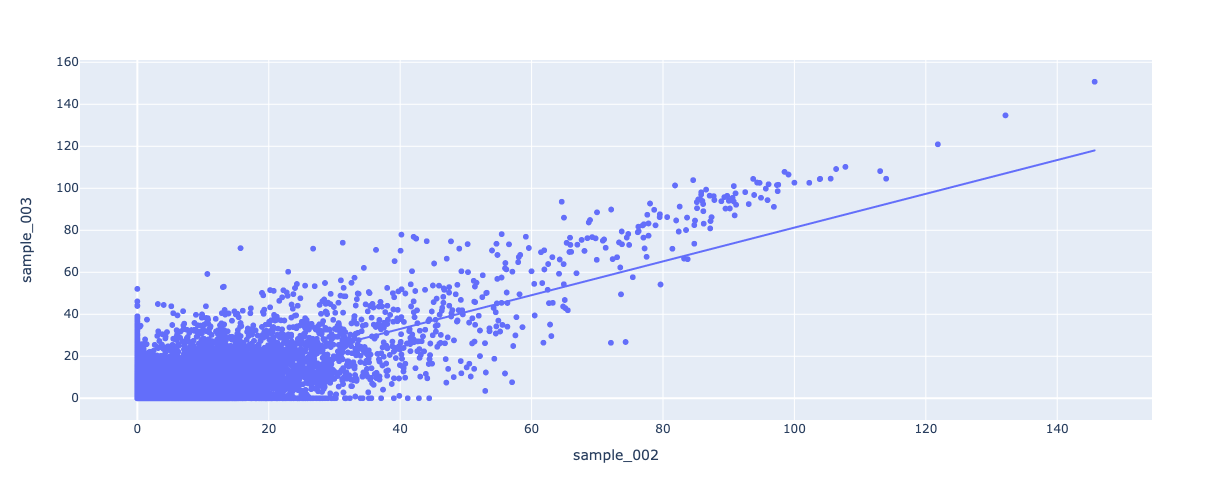

In [13]:
px.scatter(
    sample_cell_type_geps["B"].unstack(0),
    x="sample_002",
    y="sample_003",
    trendline="ols")

In [14]:
fractions

B   CAF  Endothelial  Macrophage  Malignant    NK  T CD4  \
Mixture                                                                   
sample_000  0.06  0.00         0.12        0.02       0.08  0.20   0.20   
sample_001  0.04  0.00         0.14        0.18       0.20  0.16   0.02   
sample_002  0.16  0.02         0.02        0.00       0.00  0.26   0.44   
sample_003  0.04  0.06         0.00        0.08       0.02  0.34   0.12   
sample_004  0.06  0.02         0.02        0.06       0.00  0.32   0.00   
sample_005  0.40  0.00         0.06        0.00       0.04  0.00   0.12   
sample_006  0.32  0.00         0.14        0.00       0.02  0.08   0.00   
sample_007  0.08  0.48         0.00        0.00       0.00  0.00   0.00   
sample_008  0.04  0.02         0.00        0.24       0.18  0.04   0.36   
sample_009  0.32  0.10         0.12        0.00       0.08  0.00   0.06   
sample_010  0.02  0.00         0.00        0.02       0.20  0.34   0.34   
sample_011  0.12  0.16         0.04        0.02       0.00  0.08   0.00   
sample_012  0.12  0.00         0.04        0.12       0.18  0.28   0.12   
sample_013  0.02  0.00         0.10        0.08       0.46  0.00   0.16   
sample_014  0.02  0.08         0.04        0.02       0.16  0.54   0.00   
sample_015  0.14  0.18         0.12        0.00       0.10  0.34   0.10   
sample_016  0.00  0.10         0.06        0.00       0.10  0.04   0.02   
sample_017  0.02  0.28         0.08        0.42       0.00  0.06   0.00   
sample_018  0.08  0.00         0.14        0.10       0.22  0.12   0.12   
sample_019  0.08  0.02         0.00        0.02       0.28  0.08   0.18   
sample_020  0.34  0.04         0.00        0.00       0.04  0.20   0.04   
sample_021  0.04  0.00         0.14        0.04       0.12  0.30   0.00   
sample_022  0.08  0.30         0.00        0.16       0.10  0.00   0.36   
sample_023  0.30  0.16         0.04        0.12       0.02  0.18   0.06   
sample_024  0.02  0.00         0.38        0.10       0.06  0.22   0.08   
sample_025  0.32  0.00         0.14        0.00       0.34  0.08   0.08   
sample_026  0.16  0.04         0.10        0.00       0.12  0.54   0.00   
sample_027  0.06  0.20         0.64        0.00       0.00  0.02   0.00   
sample_028  0.00  0.08         0.14        0.18       0.10  0.36   0.00   
sample_029  0.14  0.12         0.04        0.30       0.06  0.18   0.02   

            T CD8  T.cell  
Mixture                    
sample_000   0.06    0.26  
sample_001   0.16    0.10  
sample_002   0.02    0.08  
sample_003   0.16    0.18  
sample_004   0.52    0.00  
sample_005   0.32    0.06  
sample_006   0.18    0.26  
sample_007   0.02    0.42  
sample_008   0.12    0.00  
sample_009   0.18    0.14  
sample_010   0.00    0.08  
sample_011   0.34    0.24  
sample_012   0.06    0.08  
sample_013   0.16    0.02  
sample_014   0.10    0.04  
sample_015   0.00    0.02  
sample_016   0.60    0.08  
sample_017   0.14    0.00  
sample_018   0.18    0.04  
sample_019   0.08    0.26  
sample_020   0.12    0.22  
sample_021   0.26    0.10  
sample_022   0.00    0.00  
sample_023   0.12    0.00  
sample_024   0.00    0.14  
sample_025   0.02    0.02  
sample_026   0.02    0.02  
sample_027   0.04    0.04  
sample_028   0.06    0.08  
sample_029   0.04    0.10

In [15]:
rng = np.random.default_rng(seed=0)

# PARAM -- set noise level
# mixture_noise = 1
mixture_noise = rng.uniform(low=0.9, high=1.1, size=(g, s))

mixtures = pd.DataFrame({
    sample: sample_cell_type_geps.loc[sample] @ fractions.loc[sample]
    for sample in samples
}) * mixture_noise

mixtures

sample_000  sample_001  sample_002  sample_003  sample_004  \
GeneSymbol                                                               
C9orf152      0.000000    0.000000    0.000000    0.057722    0.000000   
RPS11        74.827401   67.770661   74.132208   72.710356   83.248432   
ELMO2         2.128045    6.212255    4.609378   10.106456    3.175754   
CREB3L1       0.000000    0.000000    0.119944    1.664085    0.000000   
PNMA1         4.887825    4.716654    1.339179    2.768048    4.532179   
...                ...         ...         ...         ...         ...   
PIK3IP1      27.992516   10.394485   17.042142   23.961050   16.308320   
SNRPD2       29.932325   20.422599   35.165979   25.417677   45.303553   
SLC39A6       3.836750    9.513333    2.359277    4.557553    1.952898   
CTSC         39.047303   32.861247   23.730314   34.633303   35.643835   
AQP7          0.000000    0.000000    0.000000    0.000000    0.000000   

            sample_005  sample_006  sample_007  sample_008  sample_009  ...  \
GeneSymbol                                                              ...   
C9orf152      0.000000    0.000000    0.000000    0.000000    0.000000  ...   
RPS11        82.058441   79.492524   78.599341   71.331626   69.004831  ...   
ELMO2         7.687331    1.609668    2.066940    9.849214    6.180585  ...   
CREB3L1       0.000000    0.000000    0.000000    0.106047    1.179968  ...   
PNMA1         2.095686    4.129536    1.088371    5.056150    6.598926  ...   
...                ...         ...         ...         ...         ...  ...   
PIK3IP1      23.685888   26.853206   22.813416   14.050700   21.357643  ...   
SNRPD2       38.030388   29.709269   39.341673   33.244387   27.998783  ...   
SLC39A6       9.869947    2.687863    3.850906    7.317535    5.916145  ...   
CTSC         29.057163   27.656528   29.714921   39.829073   22.275300  ...   
AQP7          0.237545    0.088514    0.000000    0.000000    1.651676  ...   

            sample_020  sample_021  sample_022  sample_023  sample_024  \
GeneSymbol                                                               
C9orf152      0.000000    0.023762    0.000000    0.045578    0.000000   
RPS11        81.978807   53.397464   65.948386   68.798995   62.338568   
ELMO2         5.061981    5.067686    7.870649    9.763062   13.499614   
CREB3L1       0.294509    0.000000    0.868337    2.018006    0.000000   
PNMA1         4.845534    1.755786    4.256691    1.166914    3.816239   
...                ...         ...         ...         ...         ...   
PIK3IP1      21.681415   16.225965   20.870038   15.032374   22.266074   
SNRPD2       42.690783   20.512340   42.018148   18.867209   25.960855   
SLC39A6       6.661862   12.001415    5.140408    8.578413    7.033035   
CTSC         32.908189   35.855480   24.789880   33.997456   29.593940   
AQP7          0.077719    0.000000    0.000000    0.000000    1.673993   

            sample_025  sample_026  sample_027  sample_028  sample_029  
GeneSymbol                                                              
C9orf152      0.000000    0.054605    0.000000    0.216848    0.024836  
RPS11        65.069590   68.465634   62.589930   62.791889   70.358633  
ELMO2        10.303255    4.517753    6.918175    5.155507   10.705134  
CREB3L1       0.000000    0.350402    1.681007    0.298140    0.000000  
PNMA1         4.239752    0.717758    2.823895    7.230961    3.327911  
...                ...         ...         ...         ...         ...  
PIK3IP1      11.839888   24.466373   17.803495   23.921247   18.361721  
SNRPD2       38.031479   26.567596   33.505291   27.172738   35.363250  
SLC39A6      21.437033    5.261922    1.876237    3.932511    6.640717  
CTSC         23.026382   28.320818   21.933241   30.472719   28.860418  
AQP7          0.000000    0.037216    0.000000    0.527485    0.000000  

[23686 rows x 30 columns]

In [16]:
(mixtures.values < 0).any()

False

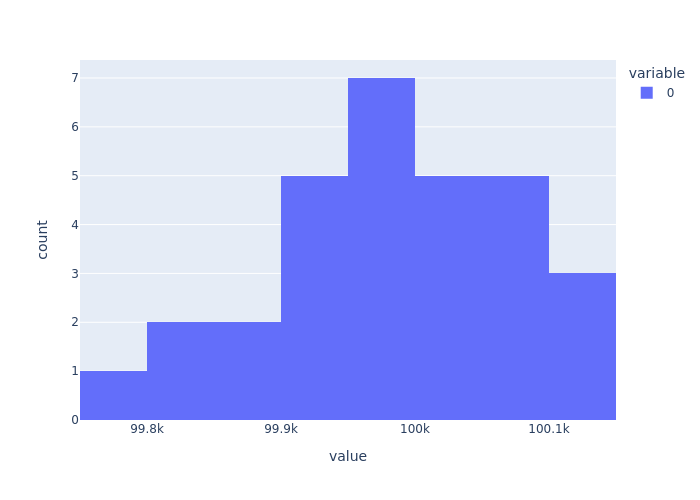

In [17]:
px.histogram(mixtures.sum(axis="rows"))

# set up cibersortx GEP imputation - "group" mode

In [18]:
base_path = os.path.abspath(os.path.join(results_dir, "group_mode"))

In [19]:
!sudo chown -R jupyter:jupyter $base_path
!rm -r $base_path
# os.makedirs(base_path, exist_ok=True)
# os.makedirs(os.path.join(base_path, "in"), exist_ok=True)
!mkdir -p $base_path/in

path = os.path.join(base_path, "in", "mixtures_computed.txt")
mixtures.to_csv(path, sep="\t")
print(path)

path = os.path.join(base_path, "fractions_known_and_empty_csx_metrics.txt")
fractions_and_empty_csx_metrics.to_csv(path, sep="\t")
print(path)

path = os.path.join(base_path, "in", "dummy_geps.txt")
sample_cell_type_geps.loc["sample_003"].to_csv(path, sep="\t")
print(path)

/home/jupyter/deconv/5d_results_noise_0.1/group_mode/in/mixtures_computed.txt
/home/jupyter/deconv/5d_results_noise_0.1/group_mode/fractions_known_and_empty_csx_metrics.txt
/home/jupyter/deconv/5d_results_noise_0.1/group_mode/in/dummy_geps.txt


In [20]:
!tree -h $base_path

/home/jupyter/deconv/5d_results_noise_0.1/group_mode
├── [1.8K]  fractions_known_and_empty_csx_metrics.txt
└── [4.0K]  in
    ├── [2.2M]  dummy_geps.txt
    └── [9.6M]  mixtures_computed.txt

1 directory, 3 files


In [21]:
!docker run \
    --rm \
    -it \
    -v $base_path/in:/src/data \
    -v $base_path:/src/outdir \
    cibersortx/gep:latest \
    --username lyronctk@stanford.edu \
    --token dfeba2c8b9d61daebee5fa87026b8e56 \
    --mixture mixtures_computed.txt \
    --cibresults fractions_known_and_empty_csx_metrics.txt \
    --sigmatrix dummy_geps.txt

!sudo chown -R jupyter:jupyter $base_path

>Running CIBERSORTx GEP imputation (representative profiles only)...
>[Options] username: lyronctk@stanford.edu
>[Options] token: dfeba2c8b9d61daebee5fa87026b8e56
>[Options] mixture: mixtures_computed.txt
>[Options] cibresults: fractions_known_and_empty_csx_metrics.txt
>[Options] sigmatrix: dummy_geps.txt
>Previous estimates of cell proportions detected. To rerun, use redocibersort=TRUE.
>Loaded 30 mixture samples, 23686 genes, and 9 cell subsets...
>Imputing representative cell type GEPs...done.
>Writing output to disk...done.
>Running time (sec): 30


In [22]:
!tree -h $base_path

/home/jupyter/deconv/5d_results_noise_0.1/group_mode
├── [2.4M]  CIBERSORTxGEP_GEPs.txt
├── [3.2M]  CIBERSORTxGEP_GEPs_CVs.txt
├── [1.5M]  CIBERSORTxGEP_GEPs_Filtered.txt
├── [2.6M]  CIBERSORTxGEP_GEPs_Pvals.txt
├── [1.5M]  CIBERSORTxGEP_GEPs_Qvals.txt
├── [3.1M]  CIBERSORTxGEP_GEPs_StdErrs.txt
├── [581K]  CIBERSORTxGEP_GEPs_ThresholdPlots.pdf
├── [1.5M]  CIBERSORTxGEP_SM_GEPs_Filtered.txt
├── [2.1K]  CIBERSORTxGEP_Weights.txt
├── [1.8K]  fractions_known_and_empty_csx_metrics.txt
└── [4.0K]  in
    ├── [2.2M]  dummy_geps.txt
    └── [9.6M]  mixtures_computed.txt

1 directory, 12 files


In [23]:
pd.read_csv(
    os.path.join(base_path, "CIBERSORTxGEP_GEPs.txt"),
    sep="\t",
    index_col=0,
)

B        CAF  Endothelial  Macrophage  Malignant  \
GeneSymbol                                                             
A1BG         0.248431   0.000000     0.903753    6.938304   4.051055   
A1BG.AS1     6.754018   0.000000     2.848457    2.048479   0.000000   
A1CF         1.596485   0.000000     0.000000    0.000000   0.000000   
A2M          0.000000  32.405032    43.762716   17.682882  32.798969   
A2M.AS1      0.000000   0.000000     0.000000    0.246184   1.108805   
...               ...        ...          ...         ...        ...   
ZYG11A      11.578576   6.527686     2.832808    3.889321   5.883860   
ZYG11B      12.975044   8.812835     4.522997    5.709126   4.499801   
ZYX         10.719097  16.223991    21.359101   20.243810   0.000000   
ZZEF1        8.660987   3.107402     4.122583    7.488136   3.328961   
ZZZ3         8.934210   3.816550     2.253185    3.209863   8.200891   

                   NK      T CD4      T CD8     T.cell  
GeneSymbol                                              
A1BG         0.000000   0.000000   0.000000   4.852774  
A1BG.AS1     0.000000   1.254894   0.739842   0.708780  
A1CF         0.071287   1.469769   0.956306   0.000000  
A2M          1.121186   0.382584   3.383842   2.734852  
A2M.AS1      2.079085   4.584343   0.000000   3.751822  
...               ...        ...        ...        ...  
ZYG11A       9.369782  13.985501   9.600257  14.278277  
ZYG11B       7.517389  13.380556   6.488584  12.278185  
ZYX         13.465159  12.923541  14.417801   8.577045  
ZZEF1        1.804185   5.181644   2.408762   6.090860  
ZZZ3         3.840397   2.525451   0.000000   4.507279  

[23686 rows x 9 columns]

In [24]:
true_geps_on_average = sample_cell_type_geps.groupby(level=1).mean()

imputed_global_geps = pd.read_csv(
    os.path.join(base_path, "CIBERSORTxGEP_GEPs.txt"),
    sep="\t",
    index_col=0,
).set_index(true_geps_on_average.index)

both = pd.concat({
        "truth": true_geps_on_average,
        "imputed": imputed_global_geps
    },
    axis=1,
    names=["result", "cell_type"]
)

In [25]:
both = both * 100000.0 / both.sum(axis='rows')

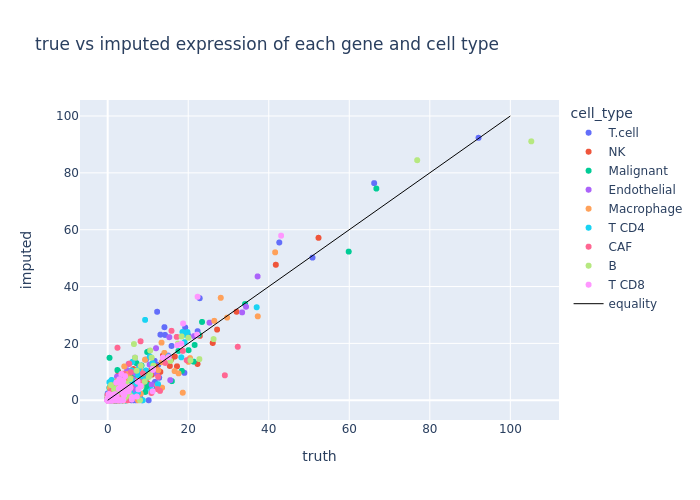

In [26]:
fig = px.scatter(
    both.stack().reset_index().sample(1000),
    x="truth",
    y="imputed",
    color="cell_type",
    title="true vs imputed expression of each gene and cell type"
)

fig.add_trace(go.Scatter(x=[0, 100], y=[0, 100], mode='lines', line=dict(color='black', width=1), name='equality'))

fig

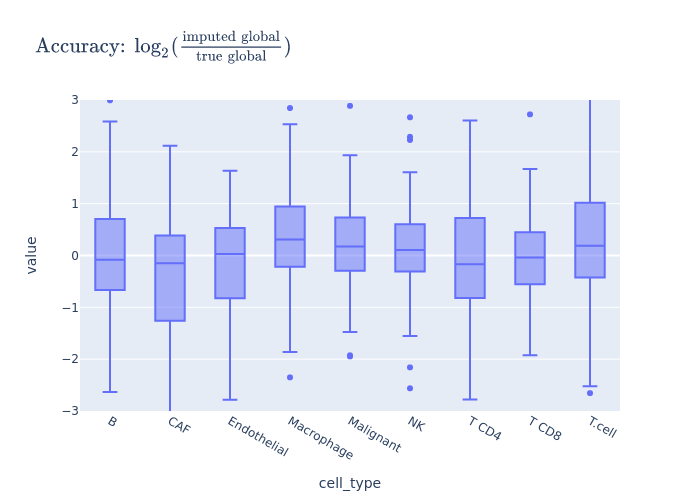

In [27]:
fig = px.box(
    np.log((both["imputed"] / both["truth"]).sample(100)) / np.log(2),
    title="$\\text{Accuracy: }\log_2(\\frac{\\text{imputed global}}{\\text{true global}})$"
)

fig.update_yaxes(range=[-3, 3])

fig.show("png")

In [28]:
both.iloc[0:3]

result         truth                                                       \
cell_type          B       CAF Endothelial Macrophage Malignant        NK   
GeneSymbol                                                                  
A1BG        0.681516  3.688307    2.216875   2.084663  3.785982  0.128486   
A1BG-AS1    1.373456  2.013003    0.506491   2.731027  2.190619  1.299823   
A1CF        0.632561  0.235377    0.174334   0.156038  0.159393  0.842891   

result                                     imputed                   \
cell_type      T CD4     T CD8    T.cell         B  CAF Endothelial   
GeneSymbol                                                            
A1BG        0.950855  1.368135  1.268154  0.249275  0.0    0.906928   
A1BG-AS1    1.298664  1.175000  1.624155  6.776942  0.0    2.858465   
A1CF        0.757645  0.486391  0.401639  1.601904  0.0    0.000000   

result                                                                  
cell_type  Macrophage Malignant       NK     T CD4     T CD8    T.cell  
GeneSymbol                                                              
A1BG         6.825244  4.118579  0.00000  0.000000  0.000000  4.835470  
A1BG-AS1     2.015099  0.000000  0.00000  1.241771  0.739826  0.706252  
A1CF         0.000000  0.000000  0.07236  1.454399  0.956284  0.000000

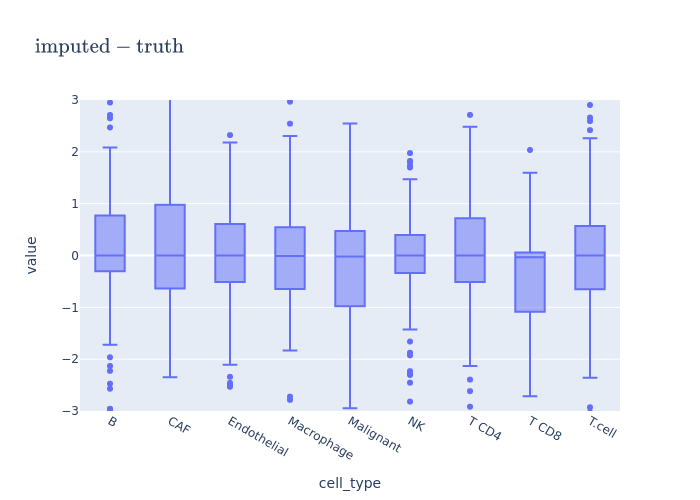

In [29]:
fig = px.box(
    (both["imputed"] - both["truth"]).sample(100),
    title="$\\text{imputed} - \\text{truth}$"
)
# 
fig.update_yaxes(range=[-3, 3])

fig.show("png")

In [30]:
relative_error = (both["imputed"] - both["truth"]) / both["truth"]

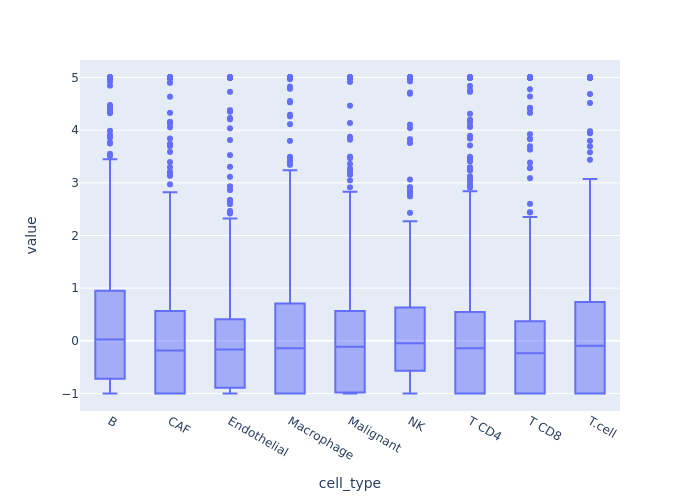

In [31]:
px.box(
    relative_error.clip(upper=5).sample(1000),
)

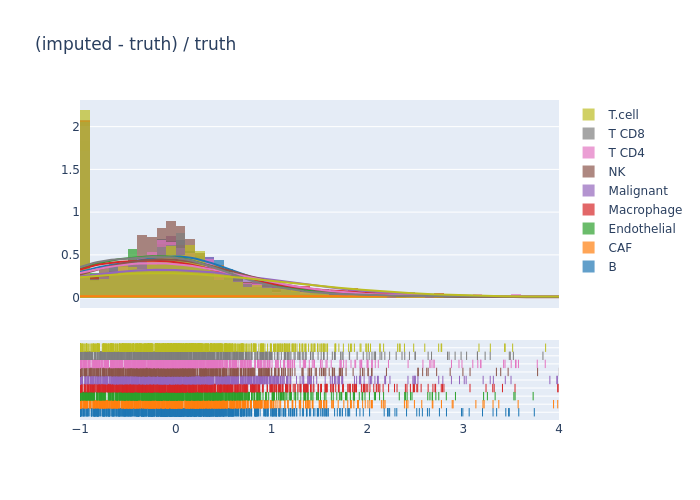

In [32]:
import plotly.figure_factory as ff

data_for_plot = relative_error\
    .replace([np.inf, -np.inf], np.nan)\
    .dropna()\
    .sample(1000)\
    .values.T.tolist()

fig = ff.create_distplot(
    data_for_plot,
    group_labels=both["truth"].columns,
    bin_size=.1
)

fig.update_layout(
    title='(imputed - truth) / truth'
)

fig.update_xaxes(range=[-1, 4])

fig

# set up cibersortx GEP imputation - "hires" mode

In [33]:
# base_path = os.path.abspath("./5c_results/hires")
base_path = os.path.abspath(os.path.join(results_dir, "hires"))

In [34]:
!sudo chown -R jupyter:jupyter $base_path
!rm -r $base_path
!mkdir -p $base_path/in

path = os.path.join(base_path, "in", "mixtures_computed.txt")
mixtures.to_csv(path, sep="\t")
print(path)

path = os.path.join(base_path, "fractions_known.txt")
fractions.to_csv(path, sep="\t")
print(path)

/home/jupyter/deconv/5d_results_noise_0.1/hires/in/mixtures_computed.txt
/home/jupyter/deconv/5d_results_noise_0.1/hires/fractions_known.txt


In [35]:
!tree -h $base_path

/home/jupyter/deconv/5d_results_noise_0.1/hires
├── [1.6K]  fractions_known.txt
└── [4.0K]  in
    └── [9.6M]  mixtures_computed.txt

1 directory, 2 files


In [36]:
!rm $base_path/CIBERSORT*

!docker run \
    --rm \
    -it \
    -v $base_path/in:/src/data \
    -v $base_path:/src/outdir \
    cibersortx/hires:latest \
    --username lyronctk@stanford.edu \
    --token dfeba2c8b9d61daebee5fa87026b8e56 \
    --mixture mixtures_computed.txt \
    --cibresults fractions_known.txt

'''
    --sigmatrix cell_type_geps_known.txt
'''

!sudo chown -R jupyter:jupyter $base_path

rm: cannot remove '/home/jupyter/deconv/5d_results_noise_0.1/hires/CIBERSORT*': No such file or directory
>Running CIBERSORTx high-resolution GEP imputation...
>[Options] username: lyronctk@stanford.edu
>[Options] token: dfeba2c8b9d61daebee5fa87026b8e56
>[Options] mixture: mixtures_computed.txt
>[Options] cibresults: fractions_known.txt
>Loaded 30 mixture samples, 23686 genes, and 9 cell subsets...
>Window size adaptively set to 15
>Imputing high-resolution cell type GEPs...done.
>Writing output to disk ...done.
>Running time (sec): 143


In [37]:
!tree -h $base_path

/home/jupyter/deconv/5d_results_noise_0.1/hires
├── [ 14M]  CIBERSORTxHiRes_NA_B_Window15.txt
├── [ 14M]  CIBERSORTxHiRes_NA_CAF_Window15.txt
├── [ 14M]  CIBERSORTxHiRes_NA_Endothelial_Window15.txt
├── [ 64K]  CIBERSORTxHiRes_NA_Heatmap_B_Window15.png
├── [ 55K]  CIBERSORTxHiRes_NA_Heatmap_CAF_Window15.png
├── [ 64K]  CIBERSORTxHiRes_NA_Heatmap_Endothelial_Window15.png
├── [ 39K]  CIBERSORTxHiRes_NA_Heatmap_Macrophage_Window15.png
├── [ 61K]  CIBERSORTxHiRes_NA_Heatmap_Malignant_Window15.png
├── [ 85K]  CIBERSORTxHiRes_NA_Heatmap_NK_Window15.png
├── [ 53K]  CIBERSORTxHiRes_NA_Heatmap_T.cell_Window15.png
├── [ 62K]  CIBERSORTxHiRes_NA_Heatmap_TCD4_Window15.png
├── [ 70K]  CIBERSORTxHiRes_NA_Heatmap_TCD8_Window15.png
├── [ 14M]  CIBERSORTxHiRes_NA_Macrophage_Window15.txt
├── [ 14M]  CIBERSORTxHiRes_NA_Malignant_Window15.txt
├── [ 14M]  CIBERSORTxHiRes_NA_NK_Window15.txt
├── [ 14M]  CIBERSORTxHiRes_NA_T.cell_Window15.txt
├── [ 14M]  CIBERSORTxHiRes_NA_TCD4_Window15.txt
├── [ 14M]  CIBERSO

In [38]:
inferred_cell_type_geps = dict()
standard_gene_index = sample_cell_type_geps["B"].loc["sample_000"].index

for path in glob.glob(os.path.join(base_path, "CIBERSORTxHiRes_NA_*_Window*txt")):
    file = os.path.basename(path)
    cell_type = file.split("_")[2]
    print(cell_type)
    df = pd.read_csv(path, sep="\t", index_col=0).rename_axis(columns="sample")
    df = df.set_index(standard_gene_index)
    inferred_cell_type_geps[cell_type] = df

all_inferred_geps = \
    pd.concat(inferred_cell_type_geps, names=["cell_type"])\
    .stack()\
    .reset_index()\
    .set_index(['sample', 'GeneSymbol', 'cell_type'])\
    .unstack(level=-1)[0]\
    .rename(columns=weird_to_nice)

TCD4
Macrophage
TCD8
T.cell
Endothelial
NK
Malignant
CAF
B


In [39]:
all_inferred_geps.head(10)

cell_type                     B        CAF  Endothelial  Macrophage  \
sample     GeneSymbol                                                 
sample_000 A1BG        1.000000   1.000000     1.000000    4.177694   
           A1BG-AS1    7.785956   1.000000     1.000000    1.000000   
           A1CF        1.000000   1.000000     1.000000    1.000000   
           A2M         1.000000  38.602931    44.971382    1.000000   
           A2M-AS1     1.000000   1.000000     1.000000    1.000000   
           A2ML1       1.000000   1.000000     1.000000    1.000000   
           A2MP1       1.000000   1.000000     1.000000    1.000000   
           A4GALT      1.000000   2.599514     4.397399    1.000000   
           A4GNT       1.000000   1.000000     1.000000    1.000000   
           AA06        1.000000   1.000000     1.000000    1.000000   

cell_type              Malignant        NK    T.cell     T CD4  T CD8  
sample     GeneSymbol                                                  
sample_000 A1BG         3.976080  1.000000  9.406688  1.000000    1.0  
           A1BG-AS1     1.000000  1.000000  1.000000  1.000000    1.0  
           A1CF         1.000000  1.000000  1.000000  2.658007    1.0  
           A2M         41.513023  1.000000  1.000000  1.000000    1.0  
           A2M-AS1      1.000000  1.000000  1.000000  1.000000    1.0  
           A2ML1        1.000000  3.463279  1.000000  4.244467    1.0  
           A2MP1        1.000000  1.000000  1.000000  1.000000    1.0  
           A4GALT       1.000000  1.000000  1.000000  1.000000    1.0  
           A4GNT        1.000000  1.000000  1.000000  1.000000    1.0  
           AA06         1.000000  1.000000  1.000000  1.000000    1.0

In [40]:
truth_and_imputed = pd.concat(
    {
        "truth": sample_cell_type_geps,
        "imputed": all_inferred_geps
    },
    axis=0,
    names=["result", "sample", "GeneSymbol"]
).stack().unstack(0).reset_index()

In [41]:
truth_and_imputed

result       sample GeneSymbol    cell_type     truth   imputed
0        sample_000       A1BG            B  0.000000  1.000000
1        sample_000       A1BG          CAF  2.939188  1.000000
2        sample_000       A1BG  Endothelial  0.000000  1.000000
3        sample_000       A1BG   Macrophage  3.545610  4.177694
4        sample_000       A1BG    Malignant  0.000000  3.976080
...             ...        ...          ...       ...       ...
6395215  sample_029       ZZZ3    Malignant  9.272800  1.000000
6395216  sample_029       ZZZ3           NK  5.389278  1.000000
6395217  sample_029       ZZZ3        T CD4  0.000000  1.000000
6395218  sample_029       ZZZ3        T CD8  0.000000  1.000000
6395219  sample_029       ZZZ3       T.cell  0.000000  1.000000

[6395220 rows x 5 columns]

In [42]:
# truth = sample_cell_type_geps["B"].unstack(level=0)

# imputed = pd.read_csv(
#     os.path.join(base_path, "CIBERSORTxHiRes_NA_B_Window36.txt"),
#     sep="\t",
#     index_col=0
# ).set_index(truth.index)

# truth_and_imputed = pd.concat(
#     {
#         "truth": truth,
#         "imputed": imputed
#     },
#     axis=1,
# #     names=["result"]
# ).stack()

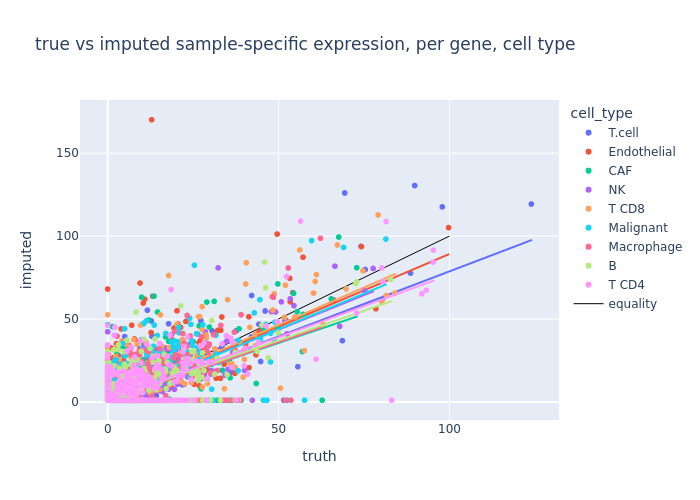

In [43]:
fig = px.scatter(
    truth_and_imputed.sample(10000),
    x="truth",
    y="imputed",
    color="cell_type",
    title="true vs imputed sample-specific expression, per gene, cell type",
    trendline='ols'
)

fig.add_trace(go.Scatter(x=[0, 100], y=[0, 100], mode='lines', line=dict(color='black', width=1), name='equality'))

fig

# Comparing global and sample-specific cell type GEPs

In [44]:
both

result          truth                                                          \
cell_type           B        CAF Endothelial Macrophage  Malignant         NK   
GeneSymbol                                                                      
A1BG         0.681516   3.688307    2.216875   2.084663   3.785982   0.128486   
A1BG-AS1     1.373456   2.013003    0.506491   2.731027   2.190619   1.299823   
A1CF         0.632561   0.235377    0.174334   0.156038   0.159393   0.842891   
A2M          0.487136  20.225477   51.156476  25.114753  25.898300   4.689413   
A2M-AS1      0.006531   0.888491    1.199870   0.527000   1.023666   3.679897   
...               ...        ...         ...        ...        ...        ...   
ZYG11A      11.216824   4.957997    6.777970   4.749009   3.730632  12.118307   
ZYG11B       7.601126   6.251825    7.061508   4.452114   4.634169   8.747077   
ZYX          7.095254  19.417643   13.232777  24.175033   8.701889  13.496318   
ZZEF1        3.375814   2.704083    3.953614   3.037320   2.524402   5.023474   
ZZZ3         6.622876   2.036681    4.705756   2.591202   5.170609   3.383922   

result                                         imputed                         \
cell_type       T CD4      T CD8     T.cell          B        CAF Endothelial   
GeneSymbol                                                                      
A1BG         0.950855   1.368135   1.268154   0.249275   0.000000    0.906928   
A1BG-AS1     1.298664   1.175000   1.624155   6.776942   0.000000    2.858465   
A1CF         0.757645   0.486391   0.401639   1.601904   0.000000    0.000000   
A2M          2.006032   3.295475   2.258276   0.000000  32.671060   43.916465   
A2M-AS1      2.034554   1.481360   1.834875   0.000000   0.000000    0.000000   
...               ...        ...        ...        ...        ...         ...   
ZYG11A      11.903244  10.336143  11.380873  11.617874   6.581274    2.842760   
ZYG11B      10.801055  10.104909   8.822762  13.019082   8.885184    4.538887   
ZYX         10.765246  10.186846  11.094670  10.755478  16.357181   21.434141   
ZZEF1        5.127429   5.404869   5.574996   8.690383   3.132912    4.137066   
ZZZ3         4.369200   3.721457   5.030081   8.964533   3.847881    2.261101   

result                                                                        
cell_type  Macrophage  Malignant         NK      T CD4      T CD8     T.cell  
GeneSymbol                                                                    
A1BG         6.825244   4.118579   0.000000   0.000000   0.000000   4.835470  
A1BG-AS1     2.015099   0.000000   0.000000   1.241771   0.739826   0.706252  
A1CF         0.000000   0.000000   0.072360   1.454399   0.956284   0.000000  
A2M         17.394739  33.345662   1.138064   0.378583   3.383765   2.725100  
A2M-AS1      0.242173   1.127287   2.110384   4.536402   0.000000   3.738444  
...               ...        ...        ...        ...        ...        ...  
ZYG11A       3.825944   5.981932   9.510837  13.839248   9.600038  14.227362  
ZYG11B       5.616096   4.574804   7.630557  13.240629   6.488436  12.234402  
ZYX         19.913937   0.000000  13.667866  12.788393  14.417472   8.546460  
ZZEF1        7.366117   3.384448   1.831345   5.127457   2.408707   6.069140  
ZZZ3         3.157559   8.337584   3.898212   2.499041   0.000000   4.491206  

[23686 rows x 18 columns]

# analyze genes in the pipeline

* in true GEPs per cell type per sample
* in global imputed
* in sample imputed

In [45]:
gene = "A2M"

In [46]:
mixtures.loc[gene]

sample_000    10.327463
sample_001    18.323817
sample_002     3.815681
sample_003     5.939909
sample_004     1.296361
sample_005     5.331844
sample_006     7.279916
sample_007    15.991457
sample_008    14.003901
sample_009    13.598929
sample_010     8.841739
sample_011    10.757069
sample_012     9.752556
sample_013    19.963754
sample_014    12.415164
sample_015    11.692578
sample_016    12.266165
sample_017    23.164823
sample_018    16.494307
sample_019    12.221937
sample_020     3.932525
sample_021    14.509357
sample_022    14.867062
sample_023     8.725471
sample_024    13.966564
sample_025    16.697754
sample_026    11.404025
sample_027    38.243153
sample_028    19.060332
sample_029    10.561707
Name: A2M, dtype: float64

In [47]:
fractions

B   CAF  Endothelial  Macrophage  Malignant    NK  T CD4  \
Mixture                                                                   
sample_000  0.06  0.00         0.12        0.02       0.08  0.20   0.20   
sample_001  0.04  0.00         0.14        0.18       0.20  0.16   0.02   
sample_002  0.16  0.02         0.02        0.00       0.00  0.26   0.44   
sample_003  0.04  0.06         0.00        0.08       0.02  0.34   0.12   
sample_004  0.06  0.02         0.02        0.06       0.00  0.32   0.00   
sample_005  0.40  0.00         0.06        0.00       0.04  0.00   0.12   
sample_006  0.32  0.00         0.14        0.00       0.02  0.08   0.00   
sample_007  0.08  0.48         0.00        0.00       0.00  0.00   0.00   
sample_008  0.04  0.02         0.00        0.24       0.18  0.04   0.36   
sample_009  0.32  0.10         0.12        0.00       0.08  0.00   0.06   
sample_010  0.02  0.00         0.00        0.02       0.20  0.34   0.34   
sample_011  0.12  0.16         0.04        0.02       0.00  0.08   0.00   
sample_012  0.12  0.00         0.04        0.12       0.18  0.28   0.12   
sample_013  0.02  0.00         0.10        0.08       0.46  0.00   0.16   
sample_014  0.02  0.08         0.04        0.02       0.16  0.54   0.00   
sample_015  0.14  0.18         0.12        0.00       0.10  0.34   0.10   
sample_016  0.00  0.10         0.06        0.00       0.10  0.04   0.02   
sample_017  0.02  0.28         0.08        0.42       0.00  0.06   0.00   
sample_018  0.08  0.00         0.14        0.10       0.22  0.12   0.12   
sample_019  0.08  0.02         0.00        0.02       0.28  0.08   0.18   
sample_020  0.34  0.04         0.00        0.00       0.04  0.20   0.04   
sample_021  0.04  0.00         0.14        0.04       0.12  0.30   0.00   
sample_022  0.08  0.30         0.00        0.16       0.10  0.00   0.36   
sample_023  0.30  0.16         0.04        0.12       0.02  0.18   0.06   
sample_024  0.02  0.00         0.38        0.10       0.06  0.22   0.08   
sample_025  0.32  0.00         0.14        0.00       0.34  0.08   0.08   
sample_026  0.16  0.04         0.10        0.00       0.12  0.54   0.00   
sample_027  0.06  0.20         0.64        0.00       0.00  0.02   0.00   
sample_028  0.00  0.08         0.14        0.18       0.10  0.36   0.00   
sample_029  0.14  0.12         0.04        0.30       0.06  0.18   0.02   

            T CD8  T.cell  
Mixture                    
sample_000   0.06    0.26  
sample_001   0.16    0.10  
sample_002   0.02    0.08  
sample_003   0.16    0.18  
sample_004   0.52    0.00  
sample_005   0.32    0.06  
sample_006   0.18    0.26  
sample_007   0.02    0.42  
sample_008   0.12    0.00  
sample_009   0.18    0.14  
sample_010   0.00    0.08  
sample_011   0.34    0.24  
sample_012   0.06    0.08  
sample_013   0.16    0.02  
sample_014   0.10    0.04  
sample_015   0.00    0.02  
sample_016   0.60    0.08  
sample_017   0.14    0.00  
sample_018   0.18    0.04  
sample_019   0.08    0.26  
sample_020   0.12    0.22  
sample_021   0.26    0.10  
sample_022   0.00    0.00  
sample_023   0.12    0.00  
sample_024   0.00    0.14  
sample_025   0.02    0.02  
sample_026   0.02    0.02  
sample_027   0.04    0.04  
sample_028   0.06    0.08  
sample_029   0.04    0.10

In [53]:
gene

'A2M'

In [48]:
import scipy.optimize as opt

In [49]:
mixtures.columns

Index(['sample_000', 'sample_001', 'sample_002', 'sample_003', 'sample_004',
       'sample_005', 'sample_006', 'sample_007', 'sample_008', 'sample_009',
       'sample_010', 'sample_011', 'sample_012', 'sample_013', 'sample_014',
       'sample_015', 'sample_016', 'sample_017', 'sample_018', 'sample_019',
       'sample_020', 'sample_021', 'sample_022', 'sample_023', 'sample_024',
       'sample_025', 'sample_026', 'sample_027', 'sample_028', 'sample_029'],
      dtype='object')

In [50]:
opt.nnls(fractions, mixtures.loc[gene])[0]

array([ 0.        , 32.92513991, 43.93895894, 17.81987073, 32.40592769,
        0.66469245,  1.60094184,  4.39168368,  2.17580037])

In [51]:
solution = pd.Series(opt.nnls(fractions, mixtures.loc[gene])[0], index=cell_types)

solution  #.set_index(cell_types)

B               0.000000
CAF            32.925140
Endothelial    43.938959
Macrophage     17.819871
Malignant      32.405928
NK              0.664692
T CD4           1.600942
T CD8           4.391684
T.cell          2.175800
dtype: float64

In [52]:
imputed_global_geps.loc[gene]

B               0.000000
CAF            32.405032
Endothelial    43.762716
Macrophage     17.682882
Malignant      32.798969
NK              1.121186
T CD4           0.382584
T CD8           3.383842
T.cell          2.734852
Name: A2M, dtype: float64